<a href="https://colab.research.google.com/github/8johan/devoir/blob/main/IDDLO-29-20/Notebooks/diff_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Linear_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Linear Regression

## imports

In [1]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline
from pandas import read_csv
!pip install fsspec

     |████████████████████████████████| 132 kB 7.2 MB/s 


## Download data

In [142]:
import urllib.request
import requests
data_path = os.path.join("project_8_predict_weight", "")
import pandas as pd
url = "https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_8_predict_weight/"
dataset = pd.read_csv("https://raw.githubusercontent.com/omairaasim/machine_learning/master/project_8_predict_weight/Height_Weight_single_variable_data_101_series_1.0.csv")
os.makedirs(data_path, exist_ok=True)




In [143]:
#take a look to the first file
dataset.head()

,Height,Weight
0,121.92,28.0
1,124.46,28.1
2,127.00,28.2
3,129.54,28.3
4,132.08,28.4


## Preprocessing

## Linear Regression Model

In [144]:
dataset.head()

,Height,Weight
0,121.92,28.0
1,124.46,28.1
2,127.00,28.2
3,129.54,28.3
4,132.08,28.4


### Select some features

In [145]:
#select the features you are interested in
X = np.c_[dataset["Height"]]
y = np.c_[dataset["Weight"]]
np.shape(X)

(35, 1)

### Visualization

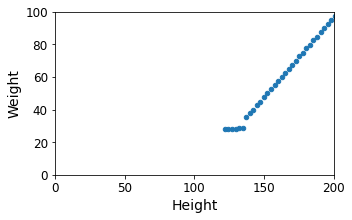

In [146]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

dataset.plot(kind='scatter', x="Height", y='Weight', figsize=(5,3))
plt.axis([0,200, 0, 100])

plt.xlabel("Height")

plt.show()
#

### Training

In [147]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)
print(X)
#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

[[121.92]
 [124.46]
 [127.  ]
 [129.54]
 [132.08]
 [134.62]
 [137.16]
 [139.7 ]
 [142.24]
 [144.78]
 [147.32]
 [149.86]
 [152.4 ]
 [154.94]
 [157.48]
 [160.02]
 [162.56]
 [165.1 ]
 [167.64]
 [170.18]
 [172.72]
 [175.26]
 [177.8 ]
 [180.34]
 [182.88]
 [185.42]
 [187.96]
 [190.5 ]
 [193.04]
 [195.58]
 [198.12]
 [200.66]
 [203.2 ]
 [205.  ]
 [208.  ]]
0.9949028181951736


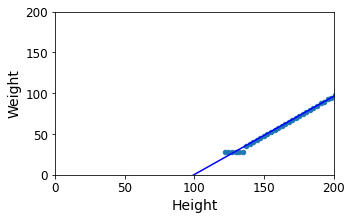

In [148]:
#plot
dataset.plot(kind='scatter', x="Height", y='Weight', figsize=(5,3))

plt.axis([0,200 , 0, 200])
x=np.linspace(0, 200, 2000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

### Prediction

In [149]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]

[[21588.27255271]]


## Add polynomial features

In [150]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=5, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scal',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

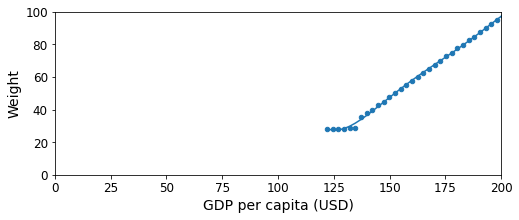

In [151]:
dataset.plot(kind='scatter', x='Height', y='Weight', figsize=(8,3))
plt.axis([0,200, 0, 100])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()


In [152]:
#R2
print(pipelineLRModel.score(X, y))

0.999035963407822


### Regularization (Ridge)

In [153]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**5) # alpha == lambda notation in the course
Xsample = np.c_[dataset["Height"]]
ysample = np.c_[dataset["Weight"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]
print(w0ridge,w1ridge)

33.22976007984444 0.17918857308124733


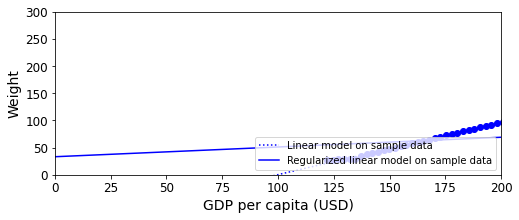

In [154]:
f = plt.figure(figsize=(8,3))

plt.xlabel("Height")
plt.ylabel('Weight')

plt.plot(list(dataset["Height"]), list(dataset["Weight"]), "bo")

x = np.linspace(0, 200, 300)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 200, 0, 300])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [155]:
#R2
print(lrModelRidge.score(X, y))

0.336738503801872


Regularization (lasso)

## Exercise

In [157]:
from sklearn.linear_model import Lasso
lrModellasso = sklearn.linear_model.Lasso(alpha=10**2) # alpha == lambda notation in the course
Xsample = np.c_[dataset["Height"]]
ysample = np.c_[dataset["Weight"]]
lrModellasso.fit(Xsample, ysample)
w0lasso, w1lasso = lrModellasso.intercept_, lrModellasso.coef_
print(w0lasso,w1lasso)

[-70.4866127] [0.80750283]


0.9600183750530673


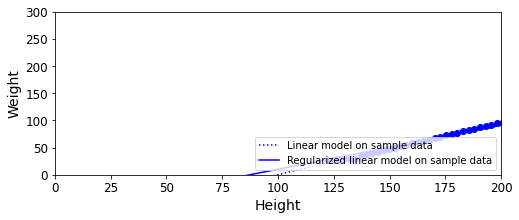

In [159]:
f = plt.figure(figsize=(8,3))

plt.xlabel("Height")
plt.ylabel('Weight')

plt.plot(list(dataset["Height"]), list(dataset["Weight"]), "bo")

x = np.linspace(0, 200, 300)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0lasso + w1lasso * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 200, 0, 300])
plt.xlabel("Height")
print(w1)

plt.show()

### 1- try LASSO regularization
### 2- try on different data
### 3- try with more features
### 4- tune the regularization hyper-parameter alpha (lambda in the course)